In [1]:
from mix_forward import mix_forward
import numpy as np

### 0. Test Sparsity

In [16]:
P = 40
K = 5
N = 100
M = 100
Nm = 3
Nc = 1200

In [17]:
model3_test = mix_forward(Nm,N,M,P,K,Nc)

In [18]:
EDM = model3_test.order_m(3,f=0.3,initial_data=True)

In [19]:
EDM.shape

(1000, 1200)

In [20]:
EDM.sum()/(1000*1200) # check sparsity

0.3

In [35]:
np.linalg.matrix_rank(EDM,tol=10**-5)

1000

### 1. Rank - P relation at different mixing index $\mathcal{M}$

#### 1.1 Nm = 4

In [2]:
test = mix_forward(4,100,100,10,5,2000)

In [ ]:
test.order_m()

In [3]:
Plist = np.linspace(1,10,10,dtype=int)

In [4]:
from tqdm import tqdm_notebook

In [5]:
N = 100
M = 100
K = 5
Nc = 2000
rk1 = []
rk2 = []
rk3 = []
rk4 = []
f=0.5

for P in tqdm_notebook(Plist):
    model_P = mix_forward(4,N,M,P,K,Nc)
    model_P.generate_input()
    mtx_order1 = model_P.order_m(1,f)
    mtx_order2 = model_P.order_m(2,f)
    mtx_order3 = model_P.order_m(3,f)
    mtx_order4 = model_P.order_m(4,f)
    
    rk1.append(np.linalg.matrix_rank(mtx_order1))
    rk2.append(np.linalg.matrix_rank(mtx_order2))
    rk3.append(np.linalg.matrix_rank(mtx_order3))
    rk4.append(np.linalg.matrix_rank(mtx_order4))

In [7]:
import matplotlib.pyplot as plt
from IPython import display

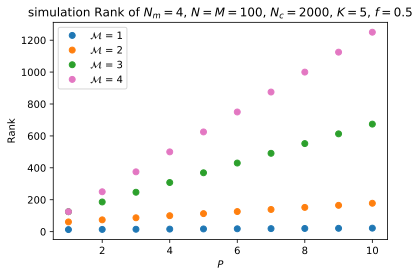

In [9]:
display.set_matplotlib_formats('svg')
plt.plot(Plist,rk1,'o',color = 'tab:blue',label=r'$\mathcal{M}$ = 1')
plt.plot(Plist,rk2,'o',color = 'tab:orange',label=r'$\mathcal{M}$ = 2')
plt.plot(Plist,rk3,'o',color = 'tab:green',label=r'$\mathcal{M}$ = 3')
plt.plot(Plist,rk4,'o',color = 'tab:pink',label=r'$\mathcal{M}$ = 4')

#plt.plot(Klist,pred1(Klist),'--',color = 'tab:blue',label = r'$P+2K-2$')
#plt.plot(Klist,pred2(Klist),'--',color = 'tab:orange',label = r'$(P-1)(2K-1)+K^2$')
#plt.plot(Klist,pred3(Klist),'--',color = 'tab:green',label = r'$PK^2$')
#plt.plot(Klist,pred_wrong(Klist),'--',color = 'black',label = r'$K(P-1+K)$, not correct')

plt.title(r'simulation Rank of $N_m = 4$, $N=M =100$, $N_c = 2000$, $K=5$, $f=0.5$')
plt.xlabel(r'$P$')
plt.ylabel('Rank')
plt.legend()

plt.show()

#### 1.2 Nm = 5

In [12]:
N = 100
M = 100
K = 4
Nc = 3000
rk1 = []
rk2 = []
rk3 = []
rk4 = []
rk5 = []
f=0.5

for P in tqdm_notebook(Plist):
    model_P = mix_forward(5,N,M,P,K,Nc)
    model_P.generate_input()
    mtx_order1 = model_P.order_m(1,f)
    mtx_order2 = model_P.order_m(2,f)
    mtx_order3 = model_P.order_m(3,f)
    mtx_order4 = model_P.order_m(4,f)
    mtx_order5 = model_P.order_m(5,f)
    
    rk1.append(np.linalg.matrix_rank(mtx_order1))
    rk2.append(np.linalg.matrix_rank(mtx_order2))
    rk3.append(np.linalg.matrix_rank(mtx_order3))
    rk4.append(np.linalg.matrix_rank(mtx_order4))
    rk5.append(np.linalg.matrix_rank(mtx_order5))

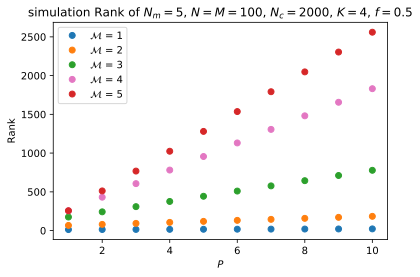

In [13]:
display.set_matplotlib_formats('svg')
plt.plot(Plist,rk1,'o',color = 'tab:blue',label=r'$\mathcal{M}$ = 1')
plt.plot(Plist,rk2,'o',color = 'tab:orange',label=r'$\mathcal{M}$ = 2')
plt.plot(Plist,rk3,'o',color = 'tab:green',label=r'$\mathcal{M}$ = 3')
plt.plot(Plist,rk4,'o',color = 'tab:pink',label=r'$\mathcal{M}$ = 4')
plt.plot(Plist,rk5,'o',color = 'tab:red',label=r'$\mathcal{M}$ = 5')


#plt.plot(Klist,pred1(Klist),'--',color = 'tab:blue',label = r'$P+2K-2$')
#plt.plot(Klist,pred2(Klist),'--',color = 'tab:orange',label = r'$(P-1)(2K-1)+K^2$')
#plt.plot(Klist,pred3(Klist),'--',color = 'tab:green',label = r'$PK^2$')
#plt.plot(Klist,pred_wrong(Klist),'--',color = 'black',label = r'$K(P-1+K)$, not correct')

plt.title(r'simulation Rank of $N_m = 5$, $N=M =100$, $N_c = 2000$, $K=4$, $f=0.5$')
plt.xlabel(r'$P$')
plt.ylabel('Rank')
plt.legend()

plt.show()

### 2. Rank-Sparsity in 3 Modality, fully mixed

#### 2.1 Realtion to Nc

In [14]:
P = 25
K = 5
N = 100
M = 100
Nm = 3
Nc_list = [1000,1500,2000,3000]

In [15]:
rk_1000=[]
rk_1500=[]
rk_2000=[]
rk_3000=[]

for Nc in tqdm_notebook(Nc_list,desc='1st loop'):
    
    flist = np.linspace(1,20,20)/float(Nc)
    model3_f_Nc = mix_forward(Nm,N,M,P,K,Nc)
    model3_f_Nc.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rk_'+str(Nc)].append(np.linalg.matrix_rank(model3_f_Nc.order_m(3,f)))

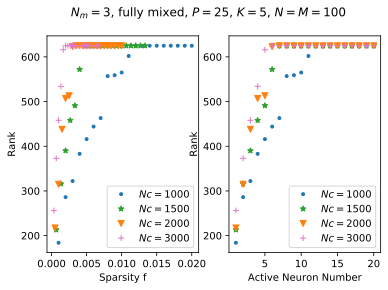

In [23]:
fig,axs = plt.subplots(1,2)
axs[0].plot(np.linspace(1,20,20)/1000,rk_1000,'.',color = 'tab:blue',label=r'$Nc=1000$')
axs[0].plot(np.linspace(1,20,20)/1500,rk_1500,'*',color = 'tab:green',label=r'$Nc=1500$')
axs[0].plot(np.linspace(1,20,20)/2000,rk_2000,'v',color = 'tab:orange',label=r'$Nc=2000$')
axs[0].plot(np.linspace(1,20,20)/3000,rk_3000,'+',color = 'tab:pink',label=r'$Nc=3000$')
#axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend()

axs[1].plot(np.linspace(1,20,20),rk_1000,'.',color = 'tab:blue',label=r'$Nc=1000$')
axs[1].plot(np.linspace(1,20,20),rk_1500,'*',color = 'tab:green',label=r'$Nc=1500$')
axs[1].plot(np.linspace(1,20,20),rk_2000,'v',color = 'tab:orange',label=r'$Nc=2000$')
axs[1].plot(np.linspace(1,20,20),rk_3000,'+',color = 'tab:pink',label=r'$Nc=3000$')
#axs[1].set_xscale('log')
axs[1].set_xlabel('Active Neuron Number')
axs[1].set_ylabel('Rank')
axs[1].legend()

plt.suptitle(r'$N_m =3$, fully mixed, $P=25$, $K=5$, $N=M=100$')
plt.show()

#### 2.2 Make Nc close or even smaller than PK**2, data collapse

In [2]:
P = 40
K = 5
N = 100
M = 100
Nm = 3
Nc_list2 = [2000,1500,1000,800,600]

In [3]:
P*K**2

1000

In [5]:
rkNc_2000=[]
rkNc_1500=[]
rkNc_1000=[]
rkNc_800=[]
rkNc_600=[]

for Nc in tqdm_notebook(Nc_list2,desc='1st loop'):
    
    flist = np.linspace(1,50,50)/float(Nc)
    model3_f_Nc = mix_forward(Nm,N,M,P,K,Nc)
    model3_f_Nc.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rkNc_'+str(Nc)].append(np.linalg.matrix_rank(model3_f_Nc.order_m(3,f)))

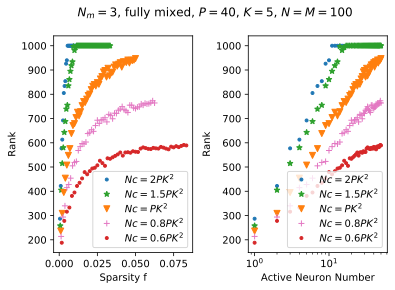

In [58]:
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.4)
axs[0].plot(np.linspace(1,50,50)/2000,rkNc_2000,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[0].plot(np.linspace(1,50,50)/1500,rkNc_1500,'*',color = 'tab:green',label=r'$Nc=1.5PK^2$')
axs[0].plot(np.linspace(1,50,50)/1000,rkNc_1000,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[0].plot(np.linspace(1,50,50)/800,rkNc_800,'+',color = 'tab:pink',label=r'$Nc=0.8PK^2$')
axs[0].plot(np.linspace(1,50,50)/600,rkNc_600,'.',color = 'tab:red',label=r'$Nc=0.6PK^2$')
#axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend()

axs[1].plot(np.linspace(1,50,50),rkNc_2000,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[1].plot(np.linspace(1,50,50),rkNc_1500,'*',color = 'tab:green',label=r'$Nc=1.5PK^2$')
axs[1].plot(np.linspace(1,50,50),rkNc_1000,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[1].plot(np.linspace(1,50,50),rkNc_800,'+',color = 'tab:pink',label=r'$Nc=0.8PK^2$')
axs[1].plot(np.linspace(1,50,50),rkNc_600,'.',color = 'tab:red',label=r'$Nc=0.6PK^2$')
axs[1].set_xscale('log')
axs[1].set_xlabel('Active Neuron Number')
axs[1].set_ylabel('Rank')
axs[1].legend()

plt.suptitle(r'$N_m =3$, fully mixed, $P=40$, $K=5$, $N=M=100$')
plt.show()

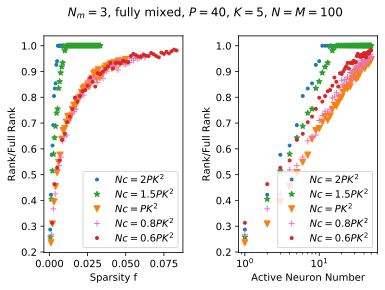

In [62]:
# normalize
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.4)
axs[0].plot(np.linspace(1,50,50)/2000,np.array(rkNc_2000)/1000.,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[0].plot(np.linspace(1,50,50)/1500,np.array(rkNc_1500)/1000.,'*',color = 'tab:green',label=r'$Nc=1.5PK^2$')
axs[0].plot(np.linspace(1,50,50)/1000,np.array(rkNc_1000)/1000.,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[0].plot(np.linspace(1,50,50)/800,np.array(rkNc_800)/800.,'+',color = 'tab:pink',label=r'$Nc=0.8PK^2$')
axs[0].plot(np.linspace(1,50,50)/600,np.array(rkNc_600)/600.,'.',color = 'tab:red',label=r'$Nc=0.6PK^2$')
#axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank/Full Rank')
axs[0].legend()

axs[1].plot(np.linspace(1,50,50),np.array(rkNc_2000)/1000.,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[1].plot(np.linspace(1,50,50),np.array(rkNc_1500)/1000.,'*',color = 'tab:green',label=r'$Nc=1.5PK^2$')
axs[1].plot(np.linspace(1,50,50),np.array(rkNc_1000)/1000.,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[1].plot(np.linspace(1,50,50),np.array(rkNc_800)/800.,'+',color = 'tab:pink',label=r'$Nc=0.8PK^2$')
axs[1].plot(np.linspace(1,50,50),np.array(rkNc_600)/600.,'.',color = 'tab:red',label=r'$Nc=0.6PK^2$')
axs[1].set_xscale('log')
axs[1].set_xlabel('Active Neuron Number')
axs[1].set_ylabel('Rank/Full Rank')
axs[1].legend()

plt.suptitle(r'$N_m =3$, fully mixed, $P=40$, $K=5$, $N=M=100$')
plt.show()

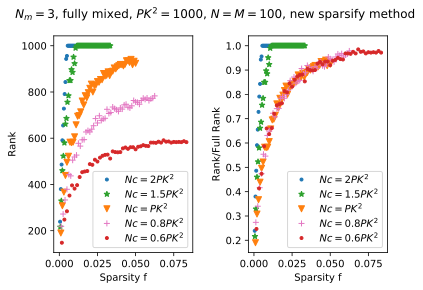

In [8]:
display.set_matplotlib_formats('svg')
# data collapse with new/correct sparsify method
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.4)
axs[0].plot(np.linspace(1,50,50)/2000,rkNc_2000,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[0].plot(np.linspace(1,50,50)/1500,rkNc_1500,'*',color = 'tab:green',label=r'$Nc=1.5PK^2$')
axs[0].plot(np.linspace(1,50,50)/1000,rkNc_1000,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[0].plot(np.linspace(1,50,50)/800,rkNc_800,'+',color = 'tab:pink',label=r'$Nc=0.8PK^2$')
axs[0].plot(np.linspace(1,50,50)/600,rkNc_600,'.',color = 'tab:red',label=r'$Nc=0.6PK^2$')
#axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend()

axs[1].plot(np.linspace(1,50,50)/2000,np.array(rkNc_2000)/1000.,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[1].plot(np.linspace(1,50,50)/1500,np.array(rkNc_1500)/1000.,'*',color = 'tab:green',label=r'$Nc=1.5PK^2$')
axs[1].plot(np.linspace(1,50,50)/1000,np.array(rkNc_1000)/1000.,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[1].plot(np.linspace(1,50,50)/800,np.array(rkNc_800)/800.,'+',color = 'tab:pink',label=r'$Nc=0.8PK^2$')
axs[1].plot(np.linspace(1,50,50)/600,np.array(rkNc_600)/600.,'.',color = 'tab:red',label=r'$Nc=0.6PK^2$')
#axs[0].set_xscale('log')
axs[1].set_xlabel('Sparsity f')
axs[1].set_ylabel('Rank/Full Rank')
axs[1].legend()

plt.suptitle(r'$N_m =3$, fully mixed, $PK^2=1000$, $N=M=100$, new sparsify method')
plt.show()

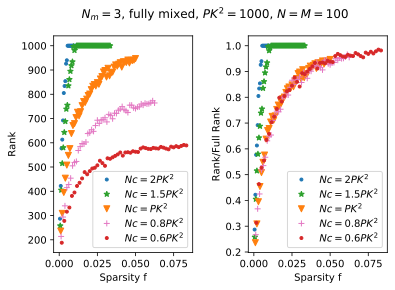

In [98]:
# data collapse with previous sparsity method
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.4)
axs[0].plot(np.linspace(1,50,50)/2000,rkNc_2000,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[0].plot(np.linspace(1,50,50)/1500,rkNc_1500,'*',color = 'tab:green',label=r'$Nc=1.5PK^2$')
axs[0].plot(np.linspace(1,50,50)/1000,rkNc_1000,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[0].plot(np.linspace(1,50,50)/800,rkNc_800,'+',color = 'tab:pink',label=r'$Nc=0.8PK^2$')
axs[0].plot(np.linspace(1,50,50)/600,rkNc_600,'.',color = 'tab:red',label=r'$Nc=0.6PK^2$')
#axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend()

axs[1].plot(np.linspace(1,50,50)/2000,np.array(rkNc_2000)/1000.,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[1].plot(np.linspace(1,50,50)/1500,np.array(rkNc_1500)/1000.,'*',color = 'tab:green',label=r'$Nc=1.5PK^2$')
axs[1].plot(np.linspace(1,50,50)/1000,np.array(rkNc_1000)/1000.,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[1].plot(np.linspace(1,50,50)/800,np.array(rkNc_800)/800.,'+',color = 'tab:pink',label=r'$Nc=0.8PK^2$')
axs[1].plot(np.linspace(1,50,50)/600,np.array(rkNc_600)/600.,'.',color = 'tab:red',label=r'$Nc=0.6PK^2$')
#axs[0].set_xscale('log')
axs[1].set_xlabel('Sparsity f')
axs[1].set_ylabel('Rank/Full Rank')
axs[1].legend()

plt.suptitle(r'$N_m =3$, fully mixed, $PK^2=1000$, $N=M=100$')
plt.show()

#### 2.3 Relation to N

In [25]:
P = 10
K = 10
M = 100
Nm = 3
Nc = 1000
N_list = [50,100,200,400,800]

In [26]:
rkN_50=[]
rkN_100=[]
rkN_200=[]
rkN_400=[]
rkN_800=[]

for N in tqdm_notebook(N_list,desc='1st loop'):
    
    flist = np.linspace(1,50,50)/float(Nc)
    model3_f_N = mix_forward(Nm,N,M,P,K,Nc)
    model3_f_N.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rkN_'+str(N)].append(np.linalg.matrix_rank(model3_f_N.order_m(3,f)))

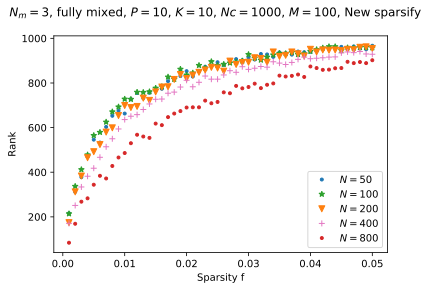

In [27]:
fig,axs = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.4)
axs.plot(np.linspace(1,50,50)/1000,rkN_50,'.',color = 'tab:blue',label=r'$N=50$')
axs.plot(np.linspace(1,50,50)/1000,rkN_100,'*',color = 'tab:green',label=r'$N=100$')
axs.plot(np.linspace(1,50,50)/1000,rkN_200,'v',color = 'tab:orange',label=r'$N=200$')
axs.plot(np.linspace(1,50,50)/1000,rkN_400,'+',color = 'tab:pink',label=r'$N=400$')
axs.plot(np.linspace(1,50,50)/1000,rkN_800,'.',color = 'tab:red',label=r'$N=800$')
#axs[0].set_xscale('log')
axs.set_xlabel('Sparsity f')
axs.set_ylabel('Rank')
axs.legend()
'''
axs[1].plot(np.linspace(1,50,50),rkN_50,'.',color = 'tab:blue',label=r'$N=50$')
axs[1].plot(np.linspace(1,50,50),rkN_100,'*',color = 'tab:green',label=r'$N=100$')
axs[1].plot(np.linspace(1,50,50),rkN_200,'v',color = 'tab:orange',label=r'$N=200$')
axs[1].plot(np.linspace(1,50,50),rkN_400,'+',color = 'tab:pink',label=r'$N=400$')
axs[1].plot(np.linspace(1,50,50),rkN_800,'.',color = 'tab:red',label=r'$N=800$')
#axs[1].set_xscale('log')
axs[1].set_xlabel('Active Neuron Number')
axs[1].set_ylabel('Rank')
axs[1].legend()
'''
plt.suptitle(r'$N_m =3$, fully mixed, $P=10$, $K=10$, $Nc = 1000$, $M=100$, New sparsify')
plt.show()

In [85]:
P = 40
K = 5
M = 100
Nm = 3
Nc = 1000
N_list = [50,100,200,400,800]

In [86]:
rkN2_50=[]
rkN2_100=[]
rkN2_200=[]
rkN2_400=[]
rkN2_800=[]

for N in tqdm_notebook(N_list,desc='1st loop'):
    
    flist = np.linspace(1,50,50)/float(Nc)
    model3_f_N = mix_forward(Nm,N,M,P,K,Nc)
    model3_f_N.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rkN2_'+str(N)].append(np.linalg.matrix_rank(model3_f_N.order_m(3,f)))

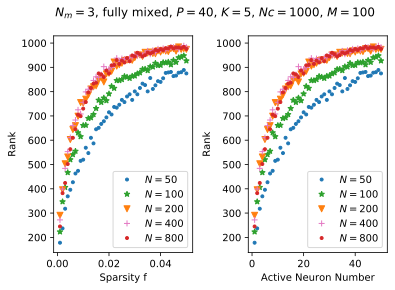

In [87]:
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.4)
axs[0].plot(np.linspace(1,50,50)/1000,rkN2_50,'.',color = 'tab:blue',label=r'$N=50$')
axs[0].plot(np.linspace(1,50,50)/1000,rkN2_100,'*',color = 'tab:green',label=r'$N=100$')
axs[0].plot(np.linspace(1,50,50)/1000,rkN2_200,'v',color = 'tab:orange',label=r'$N=200$')
axs[0].plot(np.linspace(1,50,50)/1000,rkN2_400,'+',color = 'tab:pink',label=r'$N=400$')
axs[0].plot(np.linspace(1,50,50)/1000,rkN2_800,'.',color = 'tab:red',label=r'$N=800$')
#axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend()

axs[1].plot(np.linspace(1,50,50),rkN2_50,'.',color = 'tab:blue',label=r'$N=50$')
axs[1].plot(np.linspace(1,50,50),rkN2_100,'*',color = 'tab:green',label=r'$N=100$')
axs[1].plot(np.linspace(1,50,50),rkN2_200,'v',color = 'tab:orange',label=r'$N=200$')
axs[1].plot(np.linspace(1,50,50),rkN2_400,'+',color = 'tab:pink',label=r'$N=400$')
axs[1].plot(np.linspace(1,50,50),rkN2_800,'.',color = 'tab:red',label=r'$N=800$')
#axs[1].set_xscale('log')
axs[1].set_xlabel('Active Neuron Number')
axs[1].set_ylabel('Rank')
axs[1].legend()

plt.suptitle(r'$N_m =3$, fully mixed, $P=40$, $K=5$, $Nc = 1000$, $M=100$')
plt.show()

#### 2.4 Relation to M

In [81]:
P = 10
K = 10
N = 100
Nm = 3
Nc = 1000
M_list = [50,100,200,400,800]

In [82]:
rkM_50=[]
rkM_100=[]
rkM_200=[]
rkM_400=[]
rkM_800=[]

for M in tqdm_notebook(M_list,desc='1st loop'):
    
    flist = np.linspace(1,50,50)/float(Nc)
    model3_f_M = mix_forward(Nm,N,M,P,K,Nc)
    model3_f_M.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rkM_'+str(M)].append(np.linalg.matrix_rank(model3_f_M.order_m(3,f)))

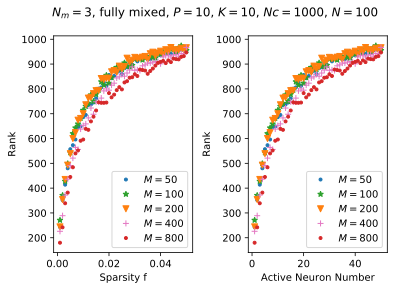

In [84]:
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.4)
axs[0].plot(np.linspace(1,50,50)/1000,rkM_50,'.',color = 'tab:blue',label=r'$M=50$')
axs[0].plot(np.linspace(1,50,50)/1000,rkM_100,'*',color = 'tab:green',label=r'$M=100$')
axs[0].plot(np.linspace(1,50,50)/1000,rkM_200,'v',color = 'tab:orange',label=r'$M=200$')
axs[0].plot(np.linspace(1,50,50)/1000,rkM_400,'+',color = 'tab:pink',label=r'$M=400$')
axs[0].plot(np.linspace(1,50,50)/1000,rkM_800,'.',color = 'tab:red',label=r'$M=800$')
#axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend()

axs[1].plot(np.linspace(1,50,50),rkM_50,'.',color = 'tab:blue',label=r'$M=50$')
axs[1].plot(np.linspace(1,50,50),rkM_100,'*',color = 'tab:green',label=r'$M=100$')
axs[1].plot(np.linspace(1,50,50),rkM_200,'v',color = 'tab:orange',label=r'$M=200$')
axs[1].plot(np.linspace(1,50,50),rkM_400,'+',color = 'tab:pink',label=r'$M=400$')
axs[1].plot(np.linspace(1,50,50),rkM_800,'.',color = 'tab:red',label=r'$M=800$')
#axs[1].set_xscale('log')
axs[1].set_xlabel('Active Neuron Number')
axs[1].set_ylabel('Rank')
axs[1].legend()

plt.suptitle(r'$N_m =3$, fully mixed, $P=10$, $K=10$, $Nc = 1000$, $N=100$')
plt.show()

#### 2.4.2 Combine the relation to N and M

#### 2.5 Relation to P or K, still data collapse?

In [76]:
K = 5
N = 100
M = 100
Nm = 3
NC = 1000
P_list2 = [20,30,40,60,80]

In [88]:
rkP_20=[]
rkP_30=[]
rkP_40=[]
rkP_60=[]
rkP_80=[]

for P in tqdm_notebook(P_list2,desc='1st loop'):
    
    flist = np.linspace(1,50,50)/float(Nc)
    model3_f_P = mix_forward(Nm,N,M,P,K,Nc)
    model3_f_P.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rkP_'+str(P)].append(np.linalg.matrix_rank(model3_f_P.order_m(3,f)))

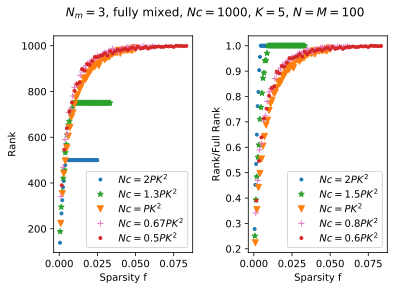

In [89]:
# data collapse
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.4)
axs[0].plot(np.linspace(1,50,50)/2000,rkP_20,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[0].plot(np.linspace(1,50,50)/1500,rkP_30,'*',color = 'tab:green',label=r'$Nc=1.3PK^2$')
axs[0].plot(np.linspace(1,50,50)/1000,rkP_40,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[0].plot(np.linspace(1,50,50)/800,rkP_60,'+',color = 'tab:pink',label=r'$Nc=0.67PK^2$')
axs[0].plot(np.linspace(1,50,50)/600,rkP_80,'.',color = 'tab:red',label=r'$Nc=0.5PK^2$')
#axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend()

axs[1].plot(np.linspace(1,50,50)/2000,np.array(rkP_20)/500.,'.',color = 'tab:blue',label=r'$Nc=2PK^2$')
axs[1].plot(np.linspace(1,50,50)/1500,np.array(rkP_30)/750.,'*',color = 'tab:green',label=r'$Nc=1.5PK^2$')
axs[1].plot(np.linspace(1,50,50)/1000,np.array(rkP_40)/1000.,'v',color = 'tab:orange',label=r'$Nc=PK^2$')
axs[1].plot(np.linspace(1,50,50)/800,np.array(rkP_60)/1000.,'+',color = 'tab:pink',label=r'$Nc=0.8PK^2$')
axs[1].plot(np.linspace(1,50,50)/600,np.array(rkP_80)/1000.,'.',color = 'tab:red',label=r'$Nc=0.6PK^2$')
#axs[0].set_xscale('log')
axs[1].set_xlabel('Sparsity f')
axs[1].set_ylabel('Rank/Full Rank')
axs[1].legend()

plt.suptitle(r'$N_m =3$, fully mixed, $Nc=1000$, $K=5$, $N=M=100$')
plt.show()

#### 2.5.2 keep Nc and PK**2 same, change combination of P,K

In [28]:
N = 100
M = 100
Nm = 3
Nc = 1000
PK_list = [[10,10],[40,5],[250,2]]

In [29]:
rkPK_10=[]
rkPK_40=[]
rkPK_250=[]

for P,K in tqdm_notebook(PK_list,desc='1st loop'):
    
    flist = 10**np.linspace(-2.5,-0.7,50)
    model3_f_PK = mix_forward(Nm,N,M,P,K,Nc)
    model3_f_PK.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rkPK_'+str(P)].append(np.linalg.matrix_rank(model3_f_PK.order_m(3,f)))

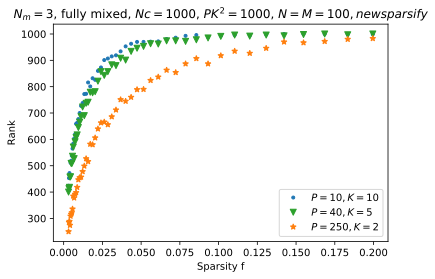

In [30]:
plt.plot(flist,rkPK_10,'.',color = 'tab:blue',label=r'$P=10, K=10$')
plt.plot(flist,rkPK_40,'v',color = 'tab:green',label=r'$P=40, K=5$')
plt.plot(flist,rkPK_250,'*',color = 'tab:orange',label=r'$P=250, K=2$')

plt.xlabel('Sparsity f')
plt.ylabel('Rank')
plt.legend()

plt.title(r'$N_m =3$, fully mixed, $Nc=1000$, $PK^2=1000$, $N=M=100, new sparsify$')
plt.show()

#### 2.6 How about in Nm = 4 and Nm = 5, fully mixed?

In [92]:
P = 10
K = 5
N = 100
M = 100
Nm = 4
Nc_list3 = [2000,1500,1250,800,600]

In [93]:
rkNc4_2000=[]
rkNc4_1500=[]
rkNc4_1250=[]
rkNc4_800=[]
rkNc4_600=[]

for Nc in tqdm_notebook(Nc_list3,desc='1st loop'):
    
    flist = 10**np.linspace(-2.5,-0.7,50)
    model4_f_Nc = mix_forward(Nm,N,M,P,K,Nc)
    model4_f_Nc.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rkNc4_'+str(Nc)].append(np.linalg.matrix_rank(model4_f_Nc.order_m(4,f)))

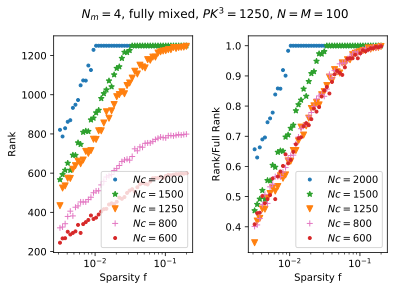

In [97]:
# data collapse
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.4)
axs[0].plot(flist,rkNc4_2000,'.',color = 'tab:blue',label=r'$Nc=2000$')
axs[0].plot(flist,rkNc4_1500,'*',color = 'tab:green',label=r'$Nc=1500$')
axs[0].plot(flist,rkNc4_1250,'v',color = 'tab:orange',label=r'$Nc=1250$')
axs[0].plot(flist,rkNc4_800,'+',color = 'tab:pink',label=r'$Nc=800$')
axs[0].plot(flist,rkNc4_600,'.',color = 'tab:red',label=r'$Nc=600$')
axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend()

axs[1].plot(flist,np.array(rkNc4_2000)/1250,'.',color = 'tab:blue',label=r'$Nc=2000$')
axs[1].plot(flist,np.array(rkNc4_1500)/1250,'*',color = 'tab:green',label=r'$Nc=1500$')
axs[1].plot(flist,np.array(rkNc4_1250)/1250,'v',color = 'tab:orange',label=r'$Nc=1250$')
axs[1].plot(flist,np.array(rkNc4_800)/800,'+',color = 'tab:pink',label=r'$Nc=800$')
axs[1].plot(flist,np.array(rkNc4_600)/600,'.',color = 'tab:red',label=r'$Nc=600$')
axs[1].set_xscale('log')
axs[1].set_xlabel('Sparsity f')
axs[1].set_ylabel('Rank/Full Rank')
axs[1].legend()

plt.suptitle(r'$N_m =4$, fully mixed, $PK^3=1250$, $N=M=100$')
plt.show()

#### 2.7 About Nm = 1, the normal framework

In [114]:
P = 1000
K = 1
N = 100
M = 100
Nm = 1
Nc_list4 = [2000,1500,1000,800,600]

In [120]:
rkNc1_2000=[]
rkNc1_1500=[]
rkNc1_1000=[]
rkNc1_800=[]
rkNc1_600=[]

for Nc in tqdm_notebook(Nc_list4,desc='1st loop'):
    
    flist = np.linspace(1,50,50)/float(Nc)
    model1_f_Nc = mix_forward(Nm,N,M,P,K,Nc)
    model1_f_Nc.generate_input()

    for f in tqdm_notebook(flist,desc='2nd loop',leave=False):
        
        locals()['rkNc1_'+str(Nc)].append(np.linalg.matrix_rank(model1_f_Nc.order_m(1,f)))

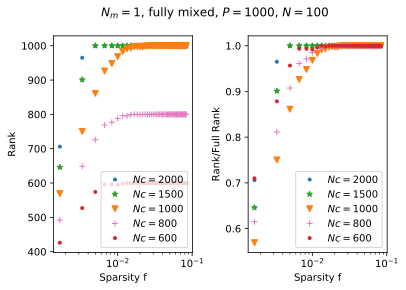

In [124]:
# data collapse
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.4)
axs[0].plot(flist,rkNc1_2000,'.',color = 'tab:blue',label=r'$Nc=2000$')
axs[0].plot(flist,rkNc1_1500,'*',color = 'tab:green',label=r'$Nc=1500$')
axs[0].plot(flist,rkNc1_1000,'v',color = 'tab:orange',label=r'$Nc=1000$')
axs[0].plot(flist,rkNc1_800,'+',color = 'tab:pink',label=r'$Nc=800$')
axs[0].plot(flist,rkNc1_600,'.',color = 'tab:red',label=r'$Nc=600$')
axs[0].set_xscale('log')
axs[0].set_xlabel('Sparsity f')
axs[0].set_ylabel('Rank')
axs[0].legend(loc='lower right')

axs[1].plot(flist,np.array(rkNc1_2000)/1000,'.',color = 'tab:blue',label=r'$Nc=2000$')
axs[1].plot(flist,np.array(rkNc1_1500)/1000,'*',color = 'tab:green',label=r'$Nc=1500$')
axs[1].plot(flist,np.array(rkNc1_1000)/1000,'v',color = 'tab:orange',label=r'$Nc=1000$')
axs[1].plot(flist,np.array(rkNc1_800)/800,'+',color = 'tab:pink',label=r'$Nc=800$')
axs[1].plot(flist,np.array(rkNc1_600)/600,'.',color = 'tab:red',label=r'$Nc=600$')
axs[1].set_xscale('log')
axs[1].set_xlabel('Sparsity f')
axs[1].set_ylabel('Rank/Full Rank')
axs[1].legend()

plt.suptitle(r'$N_m =1$, fully mixed, $P=1000$, $N=100$')
plt.show()